# Recognizing HandWritten Digits

In [2]:
from sklearn.datasets import load_digits

digits = load_digits()

dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [3]:
print(digits.images[0])

[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]


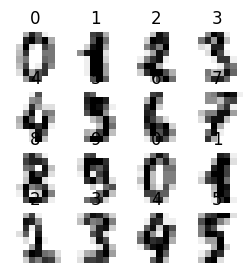

In [10]:
import matplotlib.pyplot as plt

def plot_multi(i):
  nplots = 16
  fig = plt.figure(figsize=(3,3))
  for j in range(nplots):
    plt.subplot(4,4,j+1)
    plt.imshow(digits.images[i+j], cmap='binary')
    plt.title(digits.target[i+j])
    plt.axis('off')
  plt.show()

plot_multi(0)

In [13]:
y= digits.target
X= digits.images.reshape((len(digits.images), -1))

y.shape, X.shape

((1797,), (1797, 64), (1797, 8, 8), 1797)

In [19]:
X[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [20]:
X_train = X[:1000]
y_train = y[:1000]

X_test = X[1000:]
y_test = y[1000:]

In [21]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(
    hidden_layer_sizes=(15,),
    activation="logistic",
    alpha=1e-4,
    solver="sgd",
    tol=1e-4,
    random_state=13,
    learning_rate_init=.1,
    verbose=True
)

In [22]:
mlp.fit(X_train, y_train)

Iteration 1, loss = 2.28283899
Iteration 2, loss = 1.97262508
Iteration 3, loss = 1.73242893
Iteration 4, loss = 1.46386824
Iteration 5, loss = 1.20256311
Iteration 6, loss = 0.97647764
Iteration 7, loss = 0.79183071
Iteration 8, loss = 0.64268816
Iteration 9, loss = 0.52623620
Iteration 10, loss = 0.44040697
Iteration 11, loss = 0.36840307
Iteration 12, loss = 0.31350491
Iteration 13, loss = 0.27516576
Iteration 14, loss = 0.24286250
Iteration 15, loss = 0.21597145
Iteration 16, loss = 0.19269020
Iteration 17, loss = 0.18596578
Iteration 18, loss = 0.16350553
Iteration 19, loss = 0.15263931
Iteration 20, loss = 0.13933273
Iteration 21, loss = 0.13549378
Iteration 22, loss = 0.12680737
Iteration 23, loss = 0.11631874
Iteration 24, loss = 0.11202542
Iteration 25, loss = 0.10586351
Iteration 26, loss = 0.10010416
Iteration 27, loss = 0.09626930
Iteration 28, loss = 0.09220561
Iteration 29, loss = 0.08710867
Iteration 30, loss = 0.08292723
Iteration 31, loss = 0.07990989
Iteration 32, los

MLPClassifier(activation='logistic', hidden_layer_sizes=(15,),
              learning_rate_init=0.1, random_state=13, solver='sgd',
              verbose=True)

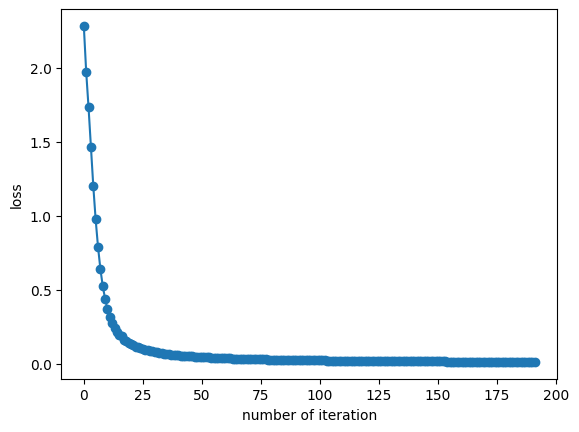

In [29]:
fig, axes = plt.subplots(1,1)

axes.plot(mlp.loss_curve_, 'o-')

axes.set_xlabel("number of iteration")

axes.set_ylabel("loss")

plt.show()

In [30]:
predictions = mlp.predict(X_test)

predictions[:50]

array([1, 4, 0, 5, 3, 6, 9, 6, 1, 7, 5, 4, 4, 7, 2, 8, 2, 2, 5, 7, 9, 5,
       4, 4, 9, 0, 8, 9, 8, 0, 1, 2, 3, 4, 5, 6, 7, 2, 9, 0, 1, 2, 3, 4,
       5, 6, 7, 8, 9, 0])

In [32]:
y_test[:50]

array([1, 4, 0, 5, 3, 6, 9, 6, 1, 7, 5, 4, 4, 7, 2, 8, 2, 2, 5, 7, 9, 5,
       4, 4, 9, 0, 8, 9, 8, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4,
       5, 6, 7, 8, 9, 0])

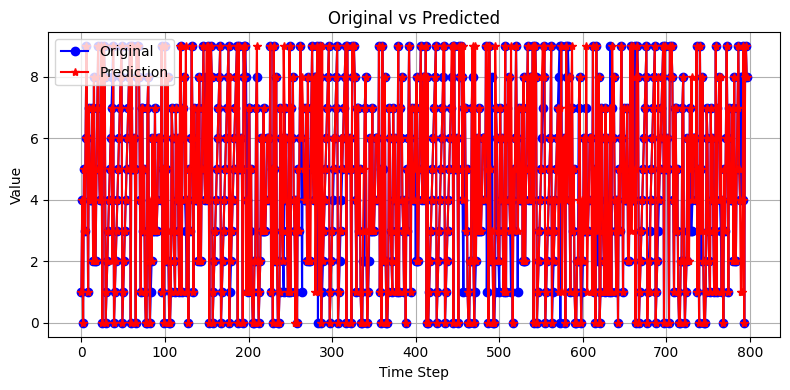

In [33]:
plt.figure(figsize=(8, 4))

plt.plot(y_test, label="Original", marker='o', color="blue")
plt.plot(predictions, label="Prediction", marker='*', color="red")

plt.title('Original vs Predicted')
plt.xlabel('Time Step')
plt.ylabel('Value')

plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [34]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, predictions)

0.9084065244667503